In [8]:
# Import required packages:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_svm_response(model, image):
    """Show the prediction for every pixel of the image, the training data and the support vectors"""

    colors = {1: (255, 255, 0), -1: (0, 255, 255)}

    # Show the prediction for every pixel of the image:
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sample = np.matrix([[j, i]], dtype=np.float32)
            response = svm_predict(model, sample)

            image[i, j] = colors[response.item(0)]

    # Show the training data:
    # Show samples with class 1:
    cv2.circle(image, (500, 10), 10, (255, 0, 0), -1)
    cv2.circle(image, (550, 100), 10, (255, 0, 0), -1)
    # Show samples with class -1:
    cv2.circle(image, (300, 10), 10, (0, 255, 0), -1)
    cv2.circle(image, (500, 300), 10, (0, 255, 0), -1)
    cv2.circle(image, (10, 600), 10, (0, 255, 0), -1)

    # Show the support vectors:
    support_vectors = model.getUncompressedSupportVectors()
    for i in range(support_vectors.shape[0]):
        cv2.circle(image, (support_vectors[i, 0], support_vectors[i, 1]), 15, (0, 0, 255), 6)


In [3]:
def show_img_with_matplotlib(color_img, title, pos):
    """ Shows an image using matplotlib capabilities """

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

In [4]:
def svm_init(C=12.5, gamma=0.50625):
    """Creates empty model and assigns main parameters"""

    model = cv2.ml.SVM_create()
    model.setGamma(gamma)
    model.setC(C)
    model.setKernel(cv2.ml.SVM_LINEAR)
    model.setType(cv2.ml.SVM_C_SVC)
    model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

    return model

In [5]:
def svm_train(model, samples, responses):
    """Trains the model using the samples and the responses"""

    model.train(samples, cv2.ml.ROW_SAMPLE, responses)
    return model

In [6]:
def svm_predict(model, samples):
    """Predicts the response based on the trained model"""

    return model.predict(samples)[1].ravel()

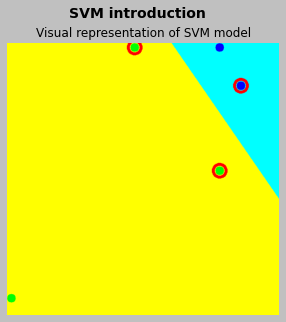

In [7]:
# Set up training data:
labels = np.array([1, 1, -1, -1, -1])
data = np.matrix([[500, 10], [550, 100], [300, 10], [500, 300], [10, 600]], dtype=np.float32)

# Initialize the SVM model:
svm_model = svm_init(C=12.5, gamma=0.50625)

# Train the SVM:
svm_train(svm_model, data, labels)

# Create the canvas (black image with three channels)
# This image will be used to show the prediction for every pixel:
img_output = np.zeros((640, 640, 3), dtype="uint8")

# Show the SVM response:
show_svm_response(svm_model, img_output)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(6, 5))
plt.suptitle("SVM introduction", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Plot the images:
show_img_with_matplotlib(img_output, "Visual representation of SVM model", 1)

# Show the Figure:
plt.show()